In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
fa = 120
fr = 5
wr = 2*np.pi*fr
csi = 0.05
w = wr*(1-csi**2)**(1/2)
time = (1/fa)*np.arange(300)
y = np.exp(-time*csi*wr)*np.cos(w*time)
y_inv = np.exp(-time*csi*wr)

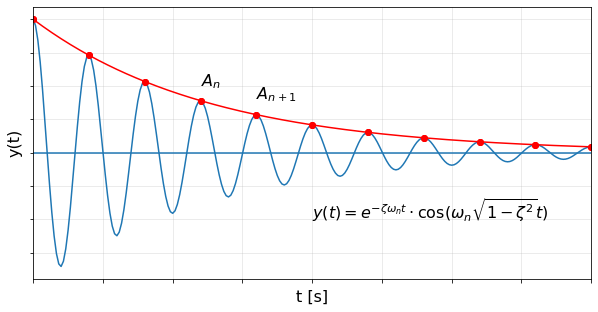

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
local_max = np.r_[True, y[1:] > y[:-1]] & np.r_[y[:-1] > y[1:], True]
plt.plot(time[local_max],y[local_max],'ro')
plt.plot(time,y)
plt.plot(time,y_inv,'r')
plt.hlines(0,0,time[-1])
plt.grid(alpha=0.3)
local_max = np.r_[True, y[1:] > y[:-1]] & np.r_[y[:-1] > y[1:], True]
plt.plot(time[local_max],y[local_max],'ro')
plt.xlabel('t [s]',fontsize=16)
plt.ylabel('y(t)',fontsize=16)
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])
plt.axis([0,2,None,None])
plt.text(1,-0.5,"$ y(t)=e^{-\zeta\omega_{n}t}\cdot\cos(\omega_{n}\sqrt{1-\zeta^{2}}t)$",fontdict={'fontsize':16})
plt.text(0.6,0.5,"$A_n$",fontdict={'fontsize':16})
plt.text(0.8,0.4,"$A_{n+1}$",fontdict={'fontsize':16})

plt.savefig("grafico_smorazamento.pdf", bbox_inches='tight')

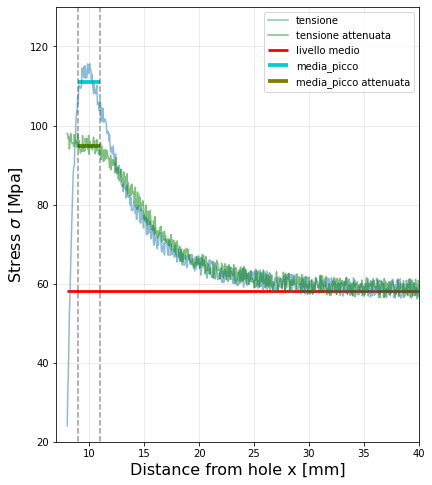

In [5]:
def Konish_Whitnely_stress_hole(R,y,Kt_inf=0.3,S_inf=10):
    S = S_inf/2*(2+(R/y)**2+3*(R/y)**4-(Kt_inf-3)*(5*(R/y)**6-7*(R/y)**8))
    return S


y = 50*np.arange(1000)/(1000)+8
S =  0*(1-1/2*np.random.rand(len(y)))
S += Konish_Whitnely_stress_hole(8,y,S_inf=50)
#[xi:xf] = 10*(1/2*(1-np.cos(2*np.pi*time[:xf-xi]/time[xf-xi])))

yi = 9
yf = 11

from scipy.ndimage import gaussian_filter1d

S_filter = gaussian_filter1d(S,50)
S_filter += 10*(1-1/2*np.random.rand(len(y)))
S += 10*(1-1/2*np.random.rand(len(y)))

mean_picco = np.mean(S[((y>yi) & (y<yf))])
mean_picco_filter = np.mean(S_filter[((y>yi) & (y<yf))])
mean_base = np.mean(S[-50:-1])

#
fig = plt.figure(figsize=(6.5, 8))
plt.plot(y,S,alpha=0.5)
plt.plot(y,S_filter,'g',alpha=0.5)
plt.hlines(mean_base,y[0],y[-1],'r',linewidth=2.8)

plt.hlines(mean_picco,yi,yf,color = 'darkturquoise',linewidth=3.8)
plt.hlines(mean_picco_filter,yi,yf,color ='olive',linewidth=3.8)

plt.vlines(yi,0,200,color = 'black',linestyle='--',alpha=0.4)
plt.vlines(yf,0,200,color = 'black',linestyle='--',alpha=0.4)
plt.axis([7,40,20,130])
plt.grid(alpha=0.3)
plt.ylabel('Stress $\sigma$ [Mpa]',fontsize=16)
plt.xlabel('Distance from hole x [mm]',fontsize=16)
plt.legend(['tensione','tensione attenuata','livello medio','media_picco','media_picco attenuata'])
fig.savefig("grafico_attenuazione.pdf", bbox_inches='tight')

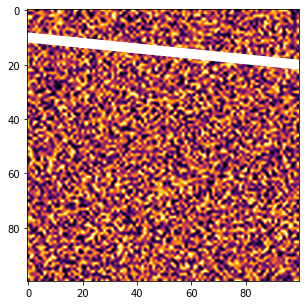

In [6]:
frame = np.random.randint(0,100,(100,100))
plt.imshow(frame,'inferno',interpolation='spline36')
line = (10/100)*np.arange(100)+10
plt.plot(np.arange(100),line,linewidth=10,c='w')

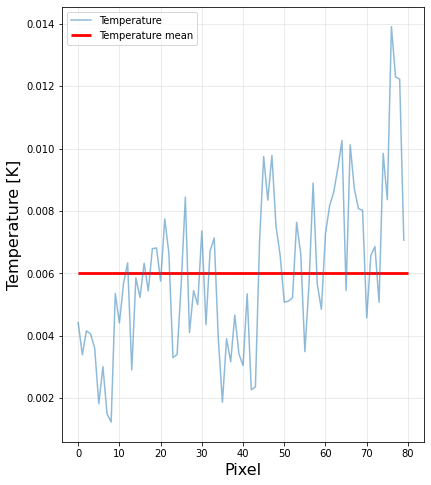

In [7]:
res_line = np.flip(np.load('line_result.npy'))
N = res_line.size
y = np.arange(N)/N*30
#S = Konish_Whitnely_stress_hole(8,y,S_inf=0.008)


#
fig = plt.figure(figsize=(6.5, 8))
plt.plot(res_line,alpha=0.5)
#plt.plot(y,S,alpha=0.5)

plt.hlines(np.mean(res_line),0,len(res_line),'r',linewidth=2.8)
#plt.axis([7,30,0,0.016])

plt.grid(alpha=0.3)
plt.ylabel('Temperature [K]',fontsize=16)
plt.xlabel('Pixel',fontsize=16)
plt.legend(['Temperature','Temperature mean'])
fig.savefig("line_result.pdf", bbox_inches='tight')
np.save('line_result.npy',res_line)

ValueError: x and y must have same first dimension, but have shapes (300,) and (80,)

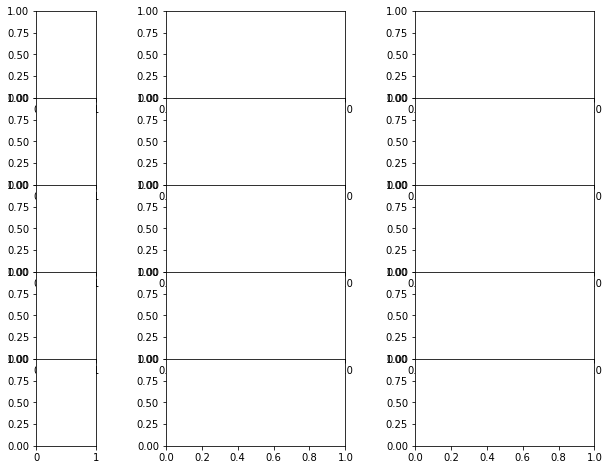

In [8]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(1, 3, wspace=0.5, hspace=0.2,width_ratios=[1,3,3])
axes = []
labels_plot = ['ply','Elastic complex modulus [Mpa]','damping $\zeta$ [adm]']
for outer_current in outer:
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer_current, hspace=0)
    col     = 0
    ax_col = []
    for _ in range(5):
        
        ax_col.append(plt.subplot(inner[col]))
        fig.add_subplot(ax_col[-1],sharex=True,aspect=10)        
        col += 1
    axes.append(ax_col)

i=0
for ax in axes:
    k = np.random.randint(10)
    ax[0].plot(time,y*k)
    ax[0].legend(['rc400_1','rc400_2','uc_400'])

    ax[1].plot(time,(k*y)**2)
    ax[2].plot(time,y*np.sin(k*time))
    ax[2].set_ylabel(labels_plot[i], fontsize=10,loc = 'center')
    i += 1
    ax[3].plot(time,y*np.sin(time)**2)
    ax[4].plot(time,y*np.sin(k*time)+k*time-2)
    ax[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


plt.xlabel('frequency', fontsize=16,loc = 'center')

fig.suptitle('Confronto a trazione', fontsize=16)
plt.show()


In [ ]:
outer[1]

In [ ]:

# gridspec inside gridspec
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(1, 2, wspace=0.07)

axsLeft = subfigs[0].subplots(5, 1, sharex=True)
subfigs[0].set_facecolor('w')
for ax in axsLeft:
    ax.plot(time,np.cos(23*time)*(1-np.sin(y)))
subfigs[0].suptitle('Left plots', fontsize='x-large')

plt.ylabel("Elastic complex modulus [Mpa]", fontsize=16)
plt.xlabel("frequency [Hz]", fontsize=16)

axsRight = subfigs[1].subplots(5, 1, sharex=True)

for nn, ax in enumerate(axsRight):
    ax.plot(time,3*np.cos(3*time)*(1-np.sin(y)))

subfigs[1].set_facecolor('w')
subfigs[1].suptitle('Right plots', fontsize='x-large')

fig.suptitle('Figure suptitle', fontsize='xx-large')


plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(5, 3)

axes_1 = plt.subplot(G[0, :])
plt.axes.set_xlabel.set_visible(False)

plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'Axes 1', ha='center', va='center', size=24, alpha=.5)

axes_2 = plt.subplot(G[1, :-1])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'Axes 2', ha='center', va='center', size=24, alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'Axes 3', ha='center', va='center', size=24, alpha=.5)

axes_4 = plt.subplot(G[-1, 0])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'Axes 4', ha='center', va='center', size=24, alpha=.5)

axes_5 = plt.subplot(G[-1, -2])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, 'Axes 5', ha='center', va='center', size=24, alpha=.5)

plt.tight_layout()
plt.show()


In [ ]:
lista = [1,2,3,4]
zi = set(lista)

In [ ]:
plt.plot(y,res_line,alpha=0.5)


In [ ]:
zi

In [ ]:
#widths = [1, 2, 2]
#gs_kw = dict(width_ratios=widths)
gs_kw ={}
gs_kw['hspace'] = 0
#gs_kw['wspace'] = 0.1

fig,ax = plt.subplots(5,2,figsize=(20,3*5),sharex='col') #sharey='row'
y_lim = 50000
f_lim = 30
data = []
# blocco 1
ax[0][0].set_title('provino 1b')
plottaggio(data_provino_1a,ax[0][0],ax[0][1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0][0],ax[0][1],f_min = f_min,flag_colore = 1)
ax[0][0].legend(['provino 1a','provino 1b'])
ax[0][1].legend(['provino 1a','provino 1b'])
ax[0][0].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_1b,f_lim),'name':'provino 1b'})
data.append({'valori':media(data_provino_1a,f_lim),'name':'provino 1a'})
# blocco 2
ax[1][0].set_title('provino 2c')
plottaggio(data_provino_2c,ax[1][0],ax[1][1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[1][0],ax[1][1],f_min = f_min,flag_colore = 1)
ax[1][0].legend(['provino 2c','provino 3c'])
ax[1][0].legend(['provino 2c','provino 3c'])
ax[1][0].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_2c,f_lim),'name':'provino 2c'})
# blocco 3
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][0],ax[2][1],f_min = f_min,flag_colore = 1)
ax[2][0].legend(['provino 3b'])
ax[2][1].legend(['provino 3b'])
ax[2][0].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_3b,f_lim),'name':'provino 3b'})
# blocco 4
ax[3][0].set_title('provino 3a')
plottaggio(data_provino_3a,ax[3][0],ax[3][1],f_min = f_min,flag_colore = 1)
ax[3][0].legend(['provino 3a'])
ax[3][1].legend(['provino 3a'])
ax[3][0].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_3a,f_lim),'name':'provino 3a'})
# blocco 5
ax[4][0].set_title('provino 4c')
plottaggio(data_provino_12a,ax[4][0],ax[4][1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[4][0],ax[4][1],f_min = f_min,flag_colore = 1)
ax[4][0].legend(['provino_12a','provino 4c'])
ax[4][1].legend(['provino_12a','provino 4c'])
ax[4][0].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_12a,f_lim),'name':'provino 12a'})
data.append({'valori':media(data_provino_4c,f_lim),'name':'provino 4c'})
#
for i in range(5):
    ax[i][0].set_xlabel("")
    ax[i][1].set_ylabel("")
    ax[i][1].label_outer()
    ax[i][0].label_outer()

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylabel("Elastic complex modulus [Mpa]", fontsize=16)
plt.xlabel("frequency [Hz]", fontsize=16)

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

fig.suptitle('complessivo ply', fontsize=16)

plt.show()
fig.savefig("complessivo.pdf", bbox_inches='tight')
fig.add_subplot(111, frameon=False)

# 